In [38]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# IMPORT ANNDATA OBJECT
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/Test'
# sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
# anndata = sdata.table
name_anndata = "anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) 

In [3]:
# GENERATE UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

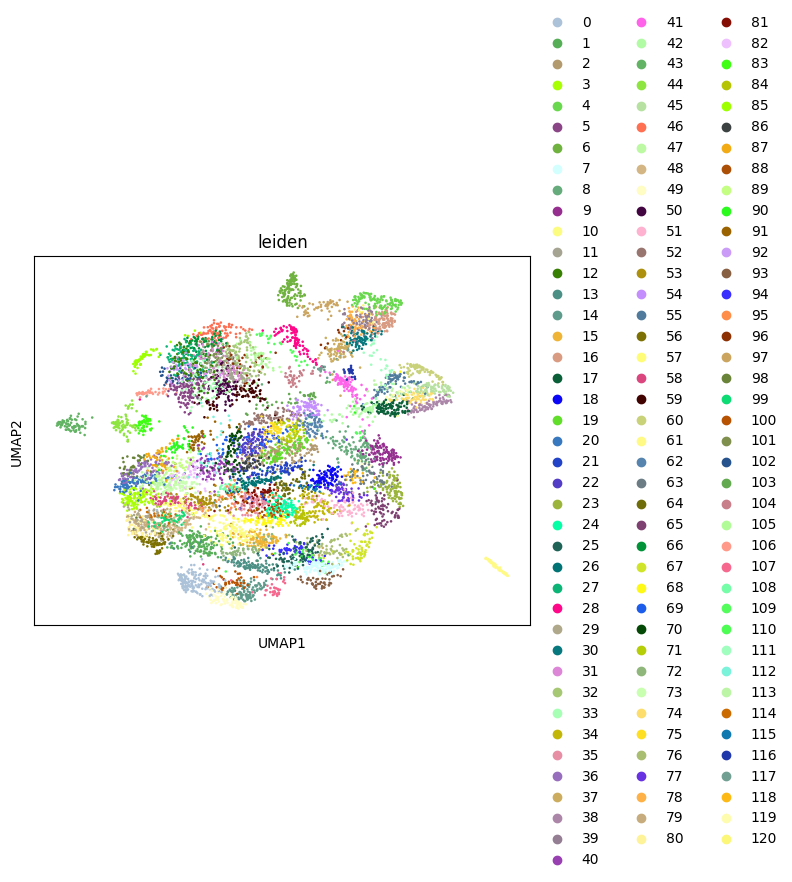

In [4]:
# LEIDEN OVERCLUSTERING
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

In [5]:
# PART 1
# Apply the original and new score genes functions based on a list of marker genes

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


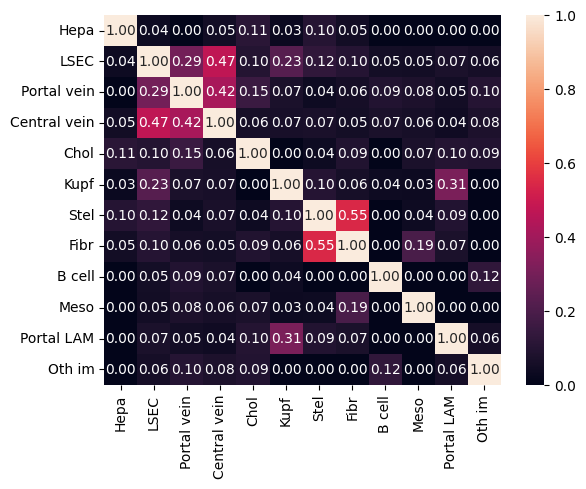

In [6]:
# IMPORT MARKER GENES
path_mg_Martin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"
Jaccard_similarity_matrix(path_mg_Martin)

In [7]:
# ORIGINAL SCORE GENES
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_Martin,
    bins = 25,
    suffix = '_Martin'
    )

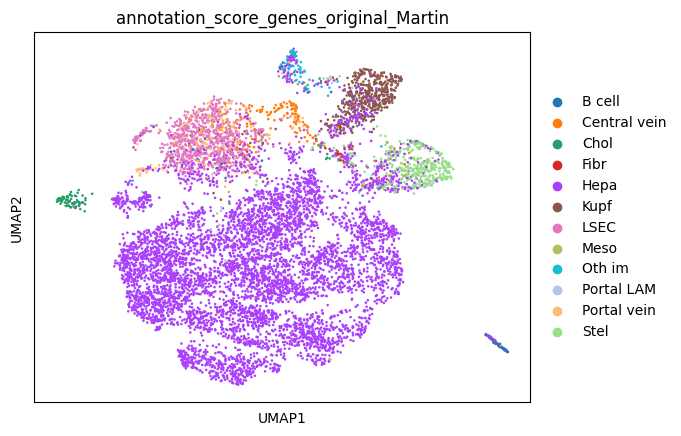

Cell type proportions:
              annotation_score_genes_original_Martin
B cell                                      0.851064
Central vein                                1.920644
Chol                                        1.023577
Fibr                                        0.253019
Hepa                                       72.800460
Kupf                                        5.704428
LSEC                                        8.556642
Meso                                        0.057504
Oth im                                      0.736055
Portal LAM                                  0.172513
Portal vein                                 2.955722
Stel                                        4.968373


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
Hepa
[(0, 1.0, 158), (1, 1.0, 148), (2, 1.0, 131), (3, 1.0, 120), (7, 1.0, 114), (8, 0.99, 113), (9, 1.0, 112), (10, 1.0, 111), (13, 1.0, 108), 

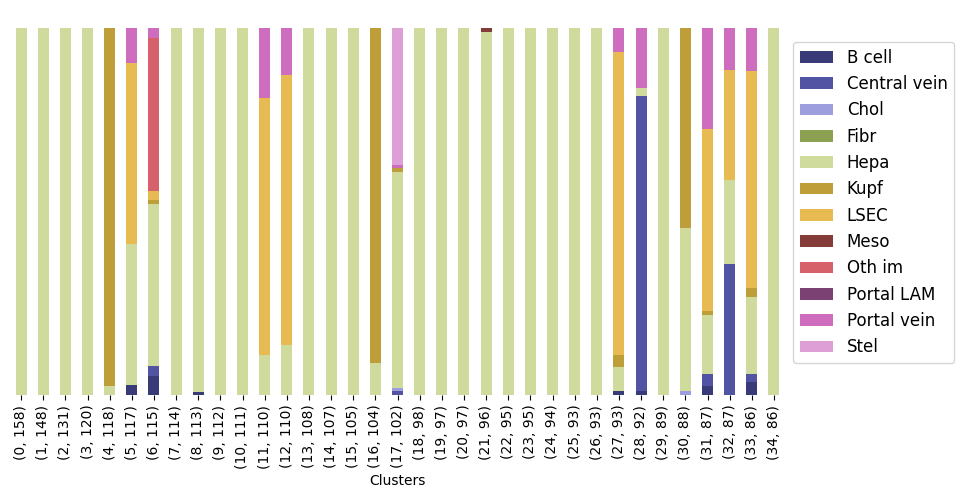

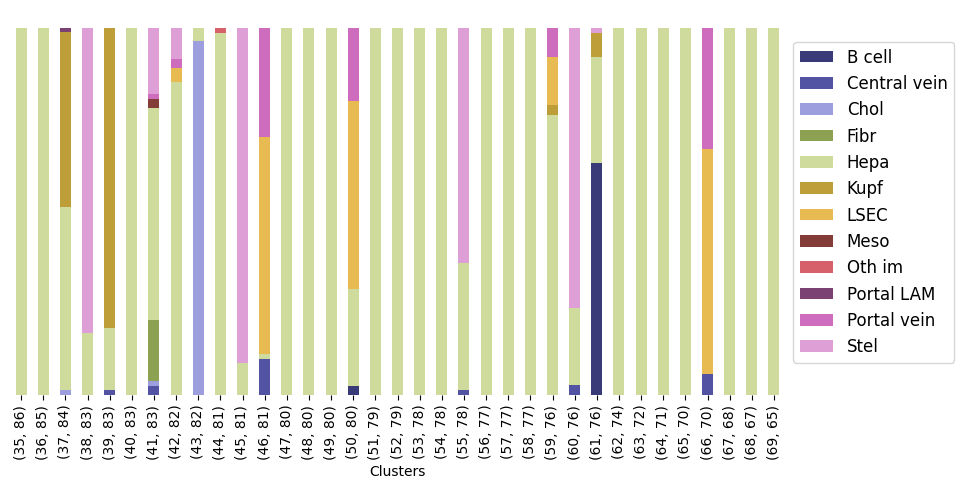

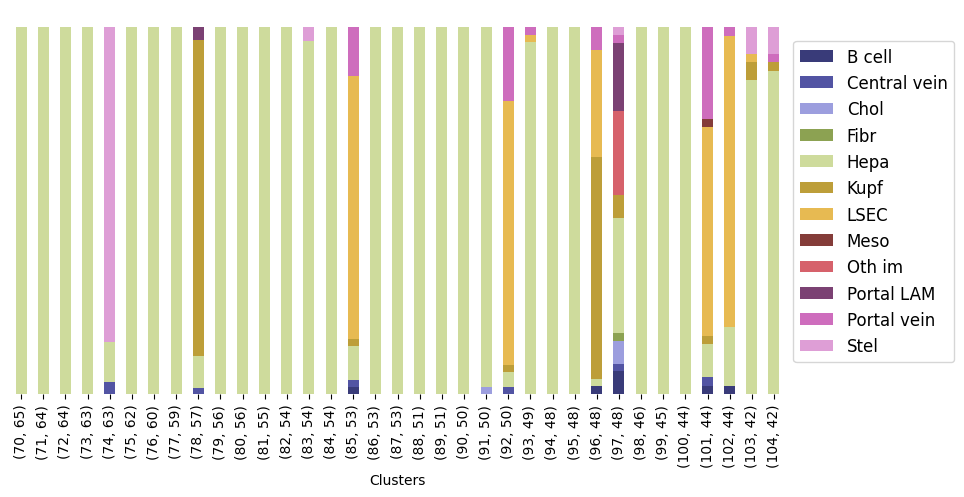

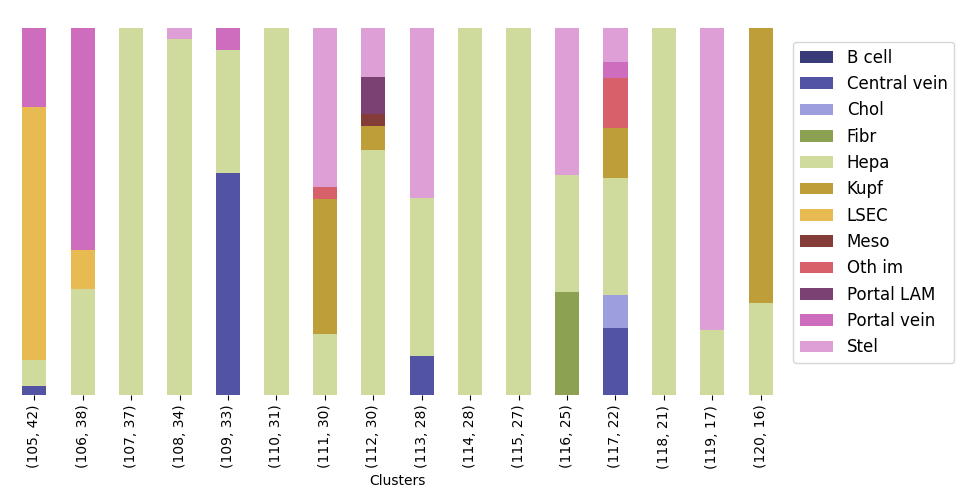

Fraction of cells in a Leiden cluster with unknown cell type:
7.395
Average cluster homogeneity:
0.869
Average cluster homogeneity per cell_type:
B cell: 0.63
Central vein: 0.705
Chol: 0.96
Fibr: nan
Hepa: 0.976
Kupf: 0.78
LSEC: 0.672
Meso: nan
Oth im: nan
Portal LAM: nan
Portal vein: 0.61
Stel: 0.803
Unknown: 0.421


Correlation between cell type scores:


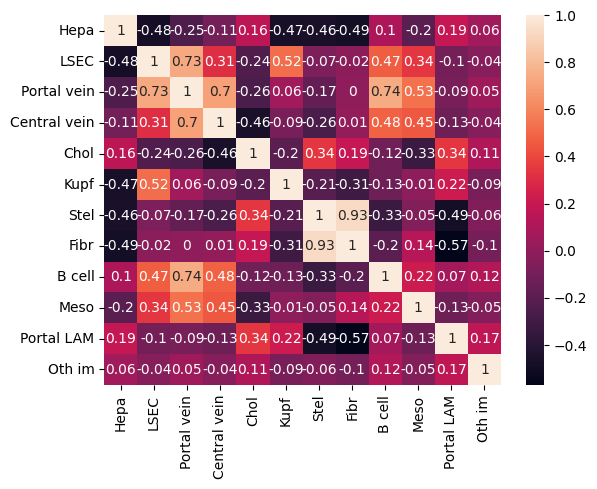

Mean correlation between scores of cell types: 0.096


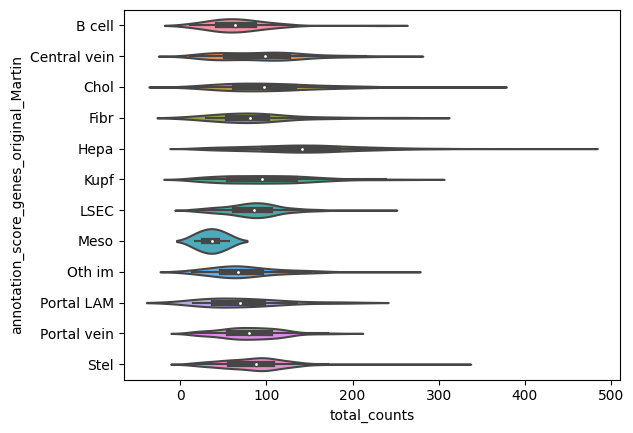

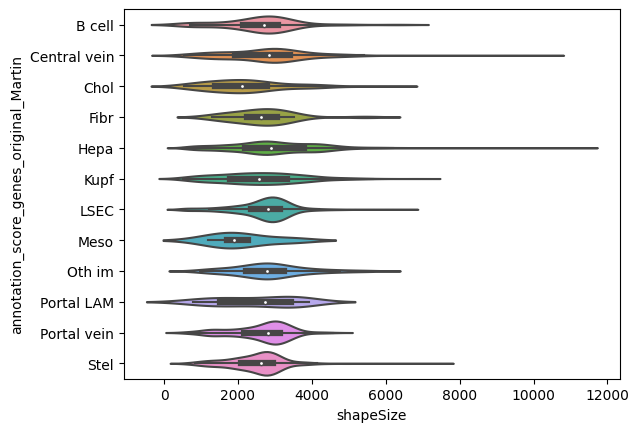

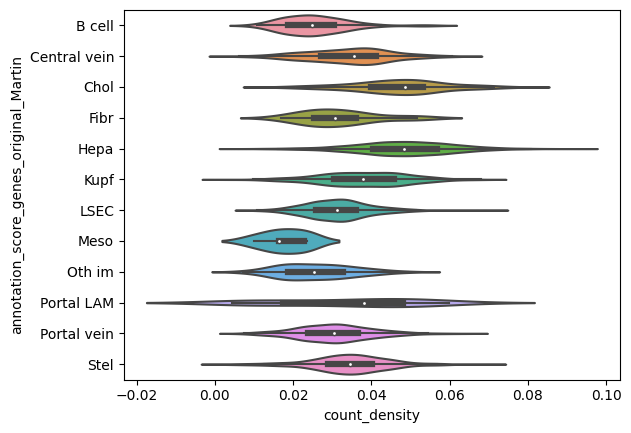

In [24]:
visualize_classification(anndata,'score_genes_original_Martin','umap_15',path_mg_Martin,plot_dot_plot=False,plot_rank_genes_groups=False)

Hepa            64.140311
LSEC            14.065555
Stel             7.717079
Kupf             5.301898
Central vein     1.495112
Oth im           1.460610
Chol             1.322599
B cell           1.058079
Fibr             0.908568
Portal LAM       0.747556
Unknown          0.701553
Meso             0.621047
Portal vein      0.460035
Name: annotation_own_score_genes_Martin, dtype: float64


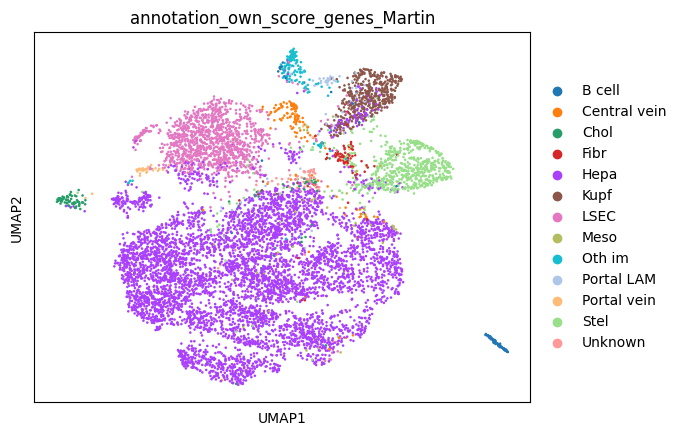

6.463484761357102


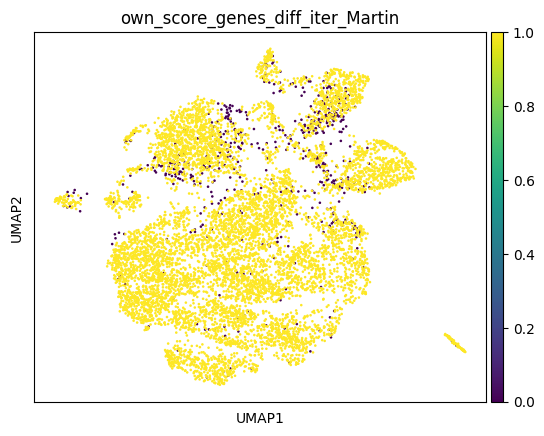

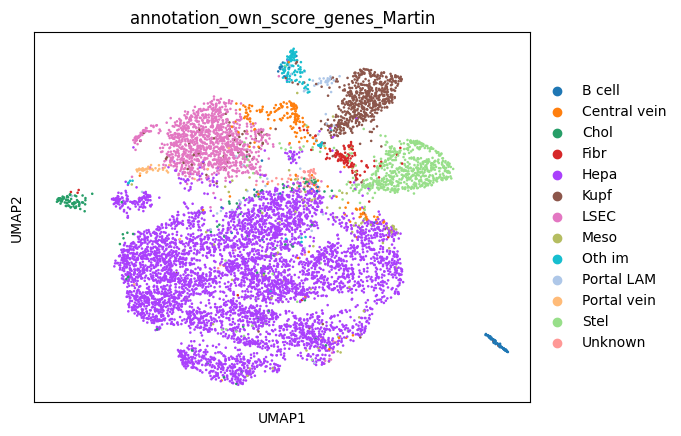

Hepa            60.989074
LSEC            13.352501
Stel             7.475561
Kupf             7.406555
Central vein     2.208166
Chol             1.759632
Fibr             1.380104
Oth im           1.345601
B cell           1.138585
Meso             1.012076
Portal LAM       0.747556
Unknown          0.701553
Portal vein      0.483036
Name: annotation_own_score_genes_Martin, dtype: float64
1.0580793559516963


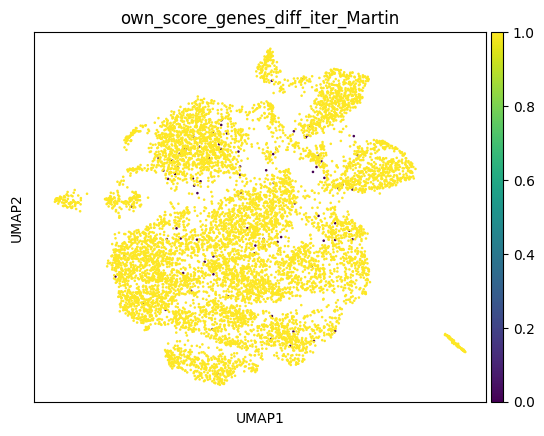

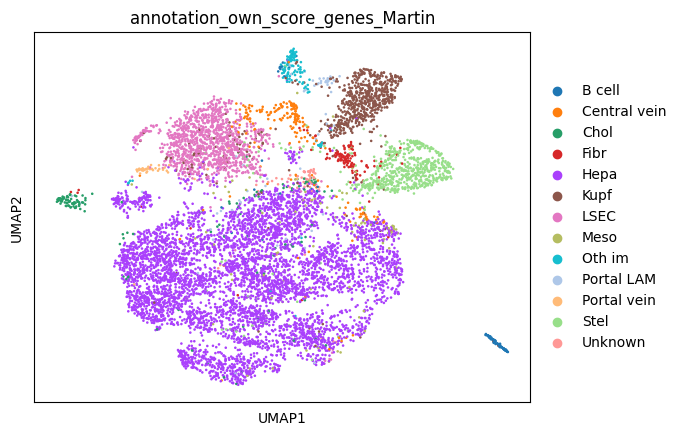

Hepa            60.402530
LSEC            13.156987
Kupf             7.797585
Stel             7.487062
Central vein     2.288672
Chol             1.851639
Fibr             1.483611
Oth im           1.311098
B cell           1.138585
Meso             1.104083
Portal LAM       0.805060
Unknown          0.701553
Portal vein      0.471535
Name: annotation_own_score_genes_Martin, dtype: float64
0.21851638872915471


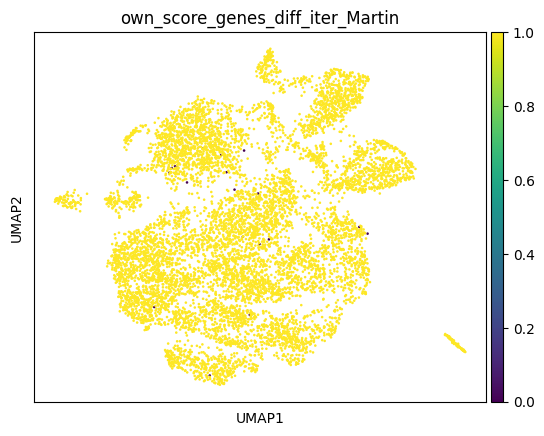

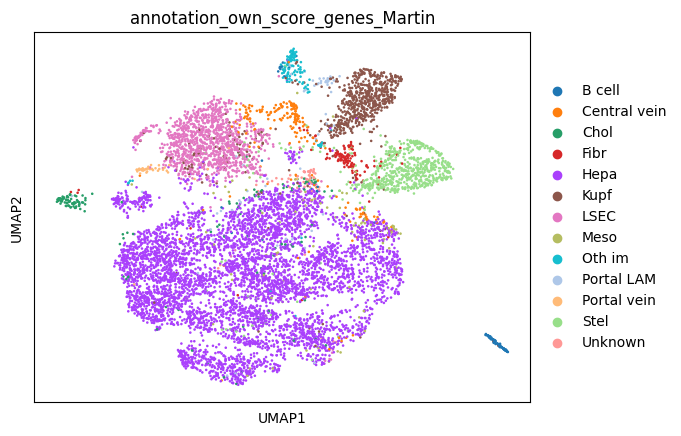

Hepa            60.276021
LSEC            13.110983
Kupf             7.889592
Stel             7.498562
Central vein     2.300173
Chol             1.886141
Fibr             1.483611
Oth im           1.311098
Meso             1.127085
B cell           1.115584
Portal LAM       0.828062
Unknown          0.701553
Portal vein      0.471535
Name: annotation_own_score_genes_Martin, dtype: float64
0.034502587694077054
converged


,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,-0.352448,-2.907739,NaN,NaN,NaN,7.258611,-3.885337,NaN,NaN,NaN,-2.597646,NaN
1,4.500428,-3.594235,-2.635837,-3.080382,0.889158,-3.221761,-4.367693,-4.788852,NaN,NaN,-0.948530,-1.137057
2,NaN,NaN,NaN,-3.902211,NaN,-5.968759,NaN,NaN,NaN,NaN,NaN,NaN
3,2.100885,-4.400493,NaN,NaN,-0.582087,-6.047820,-3.544250,-4.082382,NaN,NaN,-4.920093,NaN
4,0.024672,-3.254249,-3.305514,-3.750059,NaN,-5.294842,1.467541,-0.954504,-2.187880,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0.621855,-2.725950,NaN,NaN,-2.304175,-4.996073,14.260315,8.258607,NaN,NaN,-4.622767,NaN
8691,6.263905,NaN,NaN,NaN,3.141196,NaN,-2.151698,-2.991444,NaN,NaN,-4.816736,NaN
8692,NaN,23.711007,3.643282,17.764571,NaN,4.723799,-3.220653,-4.375658,-0.699114,0.503754,-1.110802,NaN
8693,0.076108,-1.946117,NaN,NaN,NaN,-3.479702,21.715244,12.915828,NaN,NaN,-2.502383,NaN


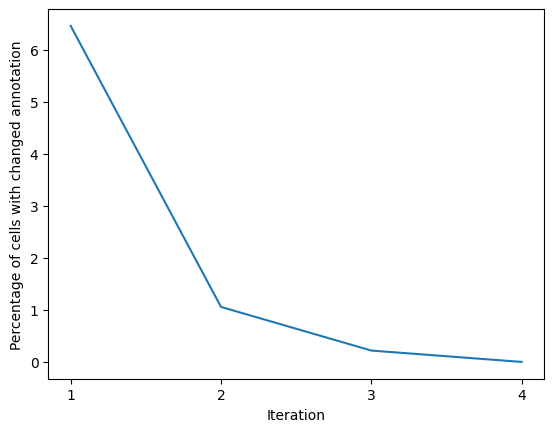

In [39]:
# NEW SCORE GENES
own_score_genes_iterative(anndata,path_mg_Martin,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Martin')

In [43]:
path_marker_genes = path_mg_Martin
marker_genes = pd.read_csv(path_marker_genes, sep=',',index_col=0)
scores_cell_celltype = pd.DataFrame()
cell_types = marker_genes.columns.tolist()
matrix = anndata.to_df()
genes_in_anndata = anndata.to_df().columns.to_list()
mean_expression = matrix.mean(axis=0)

In [50]:
for cell_type in cell_types:
    scores_cells = []
    for i in range(matrix.shape[0]):
        score = 0 
        for gene in marker_genes[marker_genes[cell_type] > 0].index.tolist():
            if gene in genes_in_anndata:
                score = score + (matrix[gene][i] - mean_expression[gene])*marker_genes[cell_type][gene]
        scores_cells.append(score)
    scores_cell_celltype[cell_type] = scores_cells

In [61]:
matrix_minus_mean = matrix - mean_expression
matrix_minus_mean

genes,Acta2,Adamtsl2,Adgre1,Adgrg6,Atp6v0d2,Axl,C5ar1,Ccr2,Ccr7,Cd19,...,Svep1,Timd4,Tmem119,Trem2,Vsig4,Vwf,Wnt2,Wnt9b,Wt1,Xcr1
cells,,,,,,,,,,,,,,,,,,,,,
35,-0.044516,-0.099475,0.937740,-0.070886,-0.272249,0.237105,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
37,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
38,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
39,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
41,-0.044516,-0.099475,-0.225820,-0.070886,3.709018,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
18377,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,-0.207719,-0.087915,-0.037236,-0.071154
18409,-0.044516,-0.099475,-0.225820,-0.070886,-0.272249,-0.313764,-0.12064,-0.078675,-0.058194,-0.077896,...,-0.05046,-0.154577,-0.107211,-0.043258,-0.241172,-0.126899,9.455748,-0.087915,-0.037236,-0.071154


In [98]:
scores_cell_celltype2 = pd.DataFrame()
for cell_type in cell_types:
    anndata.obs['score_'+cell_type] = 0
    for gene in marker_genes[marker_genes[cell_type] > 0].index.tolist():
            if gene in genes_in_anndata:
                anndata.obs['score_'+cell_type] = anndata.obs['score_'+cell_type] + matrix_minus_mean[gene]*marker_genes[cell_type][gene]
    scores_cell_celltype2[cell_type] = anndata.obs['score_'+cell_type]
    anndata.obs = anndata.obs.drop(columns=['score_'+cell_type])

In [95]:
scores_cell_celltype

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,-3.107141,-1.418504,-1.382125,-2.028200,-2.357878,9.014547,-2.458762,-2.860315,-0.552492,-0.406602,0.058169,-0.613425
1,1.745736,-2.105000,-0.026547,-0.672623,1.436831,-1.465825,-2.941117,-2.191769,-0.552492,-0.406602,1.707285,0.742153
2,-4.486666,-3.060552,-1.382125,-1.494452,-2.979161,-4.212823,-5.835849,-4.450602,-0.552492,-0.406602,-2.646462,-0.613425
3,-0.653808,-2.911258,-1.382125,-2.028200,-0.034414,-4.291884,-2.117674,-1.485299,-0.552492,-0.406602,-2.264279,-0.613425
4,-2.730021,-1.765014,-0.696225,-1.342301,-2.793201,-3.538906,2.894117,1.642579,-0.209542,-0.406602,-2.646462,-0.613425
...,...,...,...,...,...,...,...,...,...,...,...,...
8690,-2.132837,-1.236715,-1.382125,-2.028200,-1.756502,-3.240138,15.686891,10.855690,-0.552492,-0.406602,-1.966952,-0.613425
8691,3.509212,-3.060552,-1.382125,-2.028200,3.688869,-4.487114,-0.725122,-0.394361,-0.552492,-0.406602,-2.160921,-0.613425
8692,-3.886357,25.200242,6.252572,20.172330,-2.120004,6.479735,-1.794077,-1.778575,1.279223,1.356761,1.545012,-0.613425
8693,-2.678584,-0.456881,-1.382125,-2.028200,-2.455393,-1.723766,23.141820,15.512911,-0.552492,-0.406602,0.153432,-0.613425


In [100]:
scores_cell_celltype2
# remove line before index
scores_cell_celltype2.index.name = None
# set indices equal to row number
scores_cell_celltype2 = scores_cell_celltype2.reset_index(drop=True)
scores_cell_celltype2

,Hepa,LSEC,Portal vein,Central vein,Chol,Kupf,Stel,Fibr,B cell,Meso,Portal LAM,Oth im
0,-3.107141,-1.418504,-1.382125,-2.028200,-2.357878,9.014547,-2.458762,-2.860315,-0.552492,-0.406602,0.058169,-0.613425
1,1.745736,-2.105000,-0.026547,-0.672623,1.436831,-1.465825,-2.941117,-2.191769,-0.552492,-0.406602,1.707285,0.742153
2,-4.486666,-3.060552,-1.382125,-1.494452,-2.979161,-4.212823,-5.835849,-4.450602,-0.552492,-0.406602,-2.646462,-0.613425
3,-0.653808,-2.911258,-1.382125,-2.028200,-0.034414,-4.291884,-2.117674,-1.485299,-0.552492,-0.406602,-2.264279,-0.613425
4,-2.730021,-1.765014,-0.696225,-1.342301,-2.793201,-3.538906,2.894117,1.642579,-0.209542,-0.406602,-2.646462,-0.613425
...,...,...,...,...,...,...,...,...,...,...,...,...
8690,-2.132837,-1.236715,-1.382125,-2.028200,-1.756502,-3.240138,15.686891,10.855690,-0.552492,-0.406602,-1.966952,-0.613425
8691,3.509212,-3.060552,-1.382125,-2.028200,3.688869,-4.487114,-0.725122,-0.394361,-0.552492,-0.406602,-2.160921,-0.613425
8692,-3.886357,25.200242,6.252572,20.172330,-2.120004,6.479735,-1.794077,-1.778575,1.279223,1.356761,1.545012,-0.613425
8693,-2.678584,-0.456881,-1.382125,-2.028200,-2.455393,-1.723766,23.141820,15.512911,-0.552492,-0.406602,0.153432,-0.613425


In [102]:
round(scores_cell_celltype2,2)
round(scores_cell_celltype,2)
# are dataframes equal?
scores_cell_celltype.equals(scores_cell_celltype2)

True